# Introduction
In this homework, we were tasked to:
1. Accumulate data of different stocks between the dates 1/1/17 and 6/1/21 
    * The stocks include **GME, AMC, MVIS** and **NFLX** (GameStop, AMC, Microvision and Netflix)
1. Setup an algorithmic strategy and then backtest it.
    * Divide the assets equally (**WeighEqually()**)
    * Rebalance portfolio every month (**Rebalance(), RunMonthly()**)
    
# Explanation and insights
We have a strategy that will execute trades monthly on a portfolio that holds four stocks. It will sell a stock that has risen in price and redistribute the profit to buy a stock that has fallen in price, maintaining an equal amount of holdings in each stock every month.

## Results
The backtest result shows that the index rises to ~344% (Figure 1) from the initial investment given that this strategy were implemented between the given dates. While all stock remained either stable of saw variable decline during the first 3 years up till 2020. Except Netflix enjoyed a stable climb in stock prices. AMC is the only stock that has not seen any sort of recovery and has been declining since the second half of 2018.

The backtest result shows neither gains nor considerable losses until the **COVID-19 impact**. During February-March 2020, COVID-19  trough hit the backtest strongly and dropped the index to as low as ~37%. All stock show a dip (Figures 2 and 3), NFLX and AMC seeing the sharpest declines relative to their prices. 

## Insights
However, the recovery afterwards is where the backtest sees the most profit climbing fast in the succeeding months. The success of the NFLX and GME stocks being the primary reason for this increase. The effectiveness of the strategy cannot be explored considering the disruptive nature of the event. Also, the graph in figure 1 shows that the strategy overall was seeing a decline before the pandemic hit. The trend before the pandemic timeline was inconsequential and even saw a gradual decline from the second half of 2018 to the the recovery phase from the pandemic around halfway through 2020.

It is strongly recommended to **not use this strategy** to trade on the stock market.

## Supporting Plots

### Figure 1 - Strategy Backtest Index

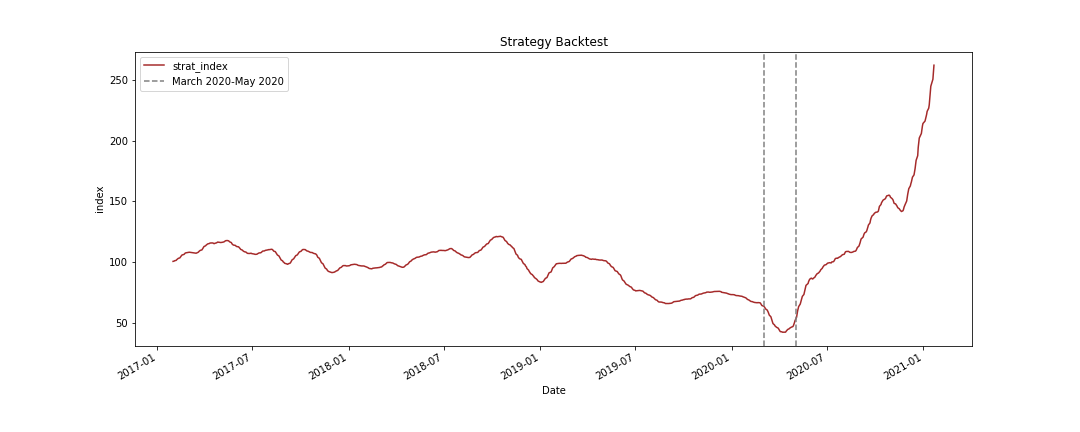

### Figure 2 - Stock Prices of GameStop, AMC and Microvision (GME, AMC and MVIS)

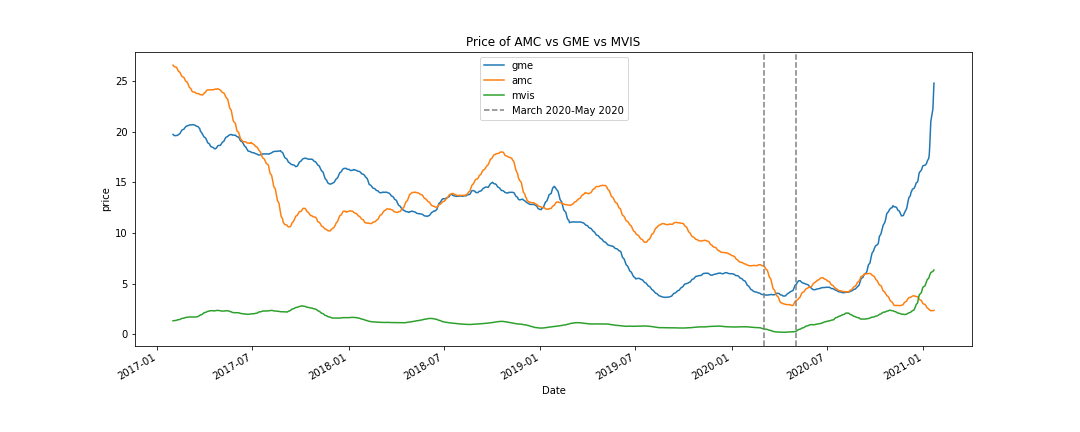

### Figure 3 - Stock Price of Netflix (NFLX)

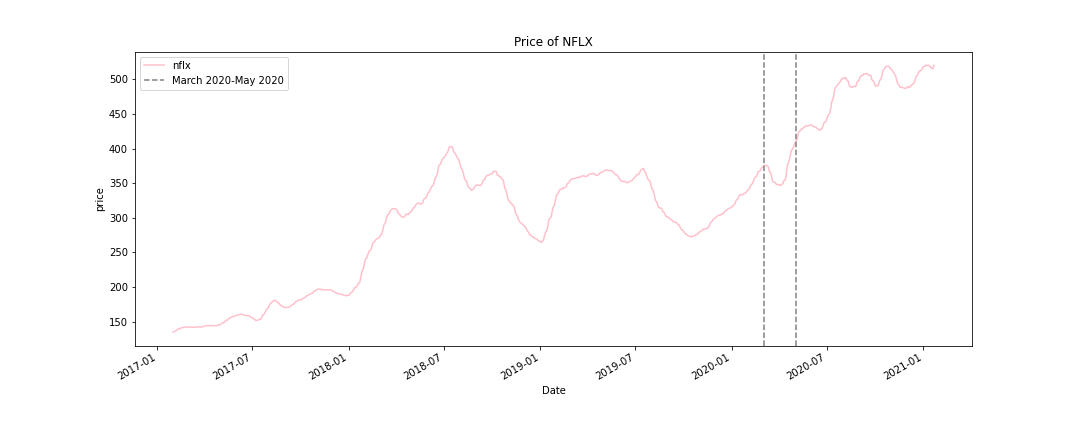

In [1]:
import bt
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# get data
price_data = bt.get('gme, amc, nflx,mvis', start='2017-1-1', end='2021-1-21')

In [3]:
# creating and backtesting a strategy
bt_strategy = bt.Strategy('strat_index',
                          [bt.algos.RunMonthly(),   # Run monthly
                           bt.algos.SelectAll(),    # Use all data
                           bt.algos.WeighEqually(), # Maintain equal weights
                           bt.algos.Rebalance()])   # Rebalance

bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)


In [4]:
# adding the index values to the price_data table
price_data = price_data.join(bt_result.prices)

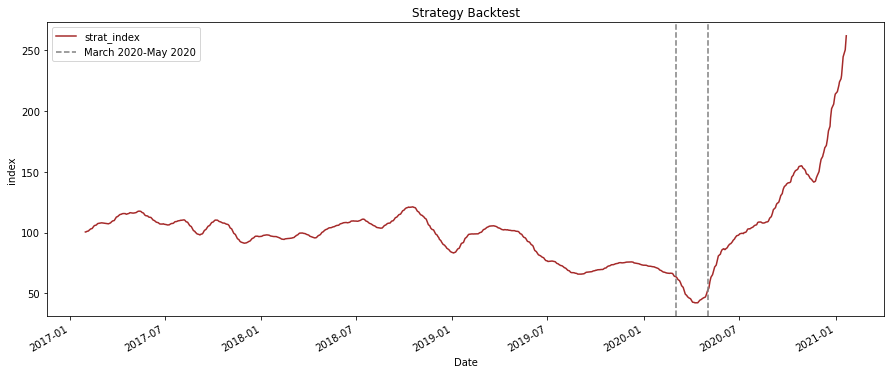

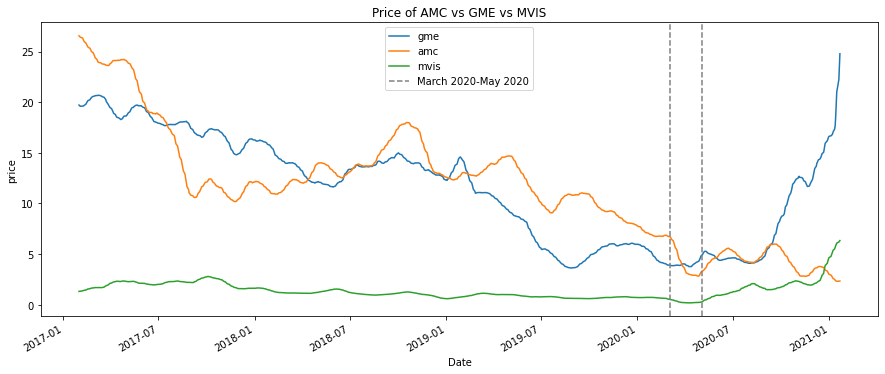

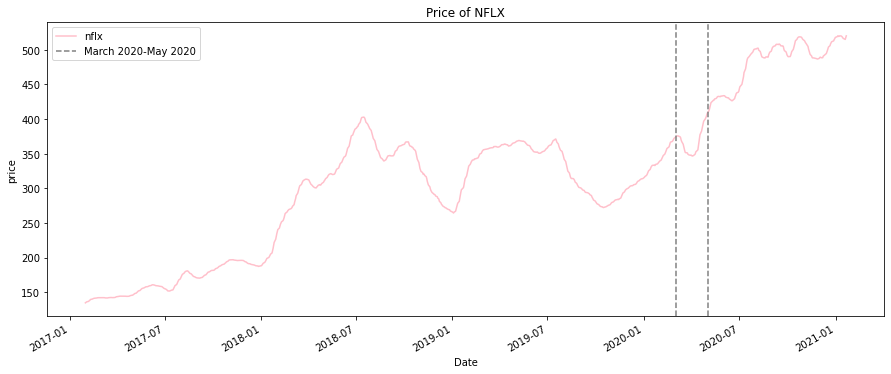

In [6]:
# plotting backtest
price_data.iloc[:,4].rolling(20).mean().plot(kind='line', figsize=(15,6), color='brown') # 
plt.axvline(x='2020-03-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2020-05-03', color='grey', linestyle='--')
plt.title('Strategy Backtest')
plt.ylabel('index')
plt.legend()
plt.savefig('./assets/HW_1_1.png') # saving figures
plt.show()

# plotting stock prices of AMC, GME and MVIS
price_data.iloc[:,[0,1,3]].rolling(20).mean().plot(kind='line', figsize=(15,6))
plt.axvline(x='2020-03-03', linestyle='--', color='grey', label='March 2020-May 2020')
plt.axvline(x='2020-05-03', color='grey', linestyle='--')
plt.title('Price of AMC vs GME vs MVIS')
plt.ylabel('price')
plt.legend()
plt.savefig('./assets/HW_1_2.png')
plt.show()

# plotting prices of NFLX
price_data.iloc[:,2].rolling(20).mean().plot(kind='line', figsize=(15,6), color='pink')
plt.axvline(x='2020-03-03', linestyle='--', color='grey', label='March 2020-May 2020')
plt.axvline(x='2020-05-03', color='grey', linestyle='--')
plt.title('Price of NFLX')
plt.ylabel('price')
plt.legend()
plt.savefig('./assets/HW_1_3.png')
plt.show()


In [7]:
bt_result.prices.min()

strat_index    37.779105
dtype: float64

In [8]:
bt_result.prices.max()

strat_index    344.865268
dtype: float64